In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import numpy as np

In [2]:
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_1_week_People")
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/15repsFood")

In [4]:
extension = 'csv'

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]


In [6]:
numitems_people = len(user_filenames)
print(numitems_people)

numitems_food = len(food_filenames)
print(numitems_food)

0
15


In [7]:
df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 df_total_user.append(temp_f)

In [8]:
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 df_total_food.append(temp_f)

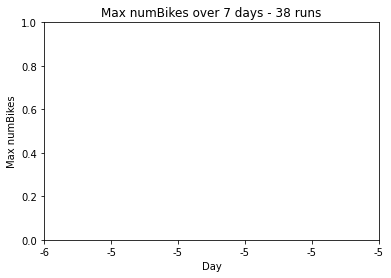

In [9]:
# Step 1: Loop over the list of dataframes and extract the maximum "NumBikes" for each day
max_values = []
for df in df_total_user:
    max_values.append(df.groupby('Day')['NumBikes'].max())

# Step 2: Create a figure and axes for the plot
fig, ax = plt.subplots()

# Step 4: Plot the lines for each dataframe
for i, values in enumerate(max_values):
    ax.plot(values.index, values.values, label=f'Dataframe {i+1}')

# Step 5: Add labels, legend, and title to the plot
ax.set_xlabel('Day')
ax.set_ylabel('Max numBikes')
#ax.legend()

# Define the custom tick formatter function
def subtract_six(x, pos):
    return int(x - 6)

# Create the custom tick formatter for the x-axis
formatter = FuncFormatter(subtract_six)
ax.xaxis.set_major_formatter(formatter)


plt.title('Max numBikes over 7 days - 38 runs')

# Step 6: Display the plot
plt.show()


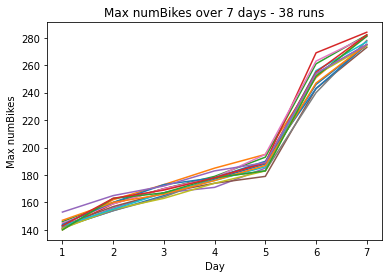

In [10]:
# Step 1: Loop over the list of dataframes and extract the maximum "NumBikes" for each day
max_values = []
for df in df_total_food:
    max_values.append(df.groupby('Day')['NumBikes'].max())

# Step 2: Create a figure and axes for the plot
fig, ax = plt.subplots()

# Step 4: Plot the lines for each dataframe
for i, values in enumerate(max_values):
    ax.plot(values.index, values.values, label=f'Dataframe {i+1}')

# Step 5: Add labels, legend, and title to the plot
ax.set_xlabel('Day')
ax.set_ylabel('Max numBikes')
#ax.legend()

# Define the custom tick formatter function
def subtract_six(x, pos):
    return int(x - 6)

# Create the custom tick formatter for the x-axis
formatter = FuncFormatter(subtract_six)
ax.xaxis.set_major_formatter(formatter)


plt.title('Max numBikes over 7 days - 38 runs')

# Step 6: Display the plot
plt.show()

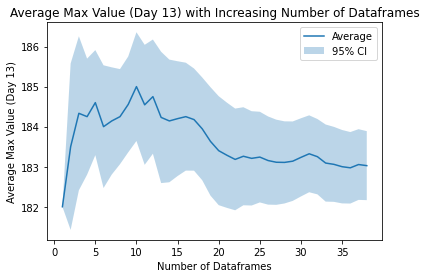

In [13]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_13 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total):
    max_value_day_13 = df.loc[df['Day'] == 13, 'NumBikes'].max()
    max_values_day_13.append(max_value_day_13)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_13[:i + 1])
    std_value = np.std(max_values_day_13[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Max Value (Day 13)')
plt.title('Average Max Value (Day 13) with Increasing Number of Dataframes')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [15]:
print(df_table)


    Number of Dataframes     Average    CI Lower    CI Upper  CI Delta
0                      1  182.000000  182.000000  182.000000  0.000000
1                      2  183.500000  181.421106  185.578894  4.157788
2                      3  184.333333  182.409972  186.256695  3.846723
3                      4  184.250000  182.800560  185.699440  2.898879
4                      5  184.600000  183.288117  185.911883  2.623766
5                      6  184.000000  182.467798  185.532202  3.064405
6                      7  184.142857  182.804201  185.481513  2.677312
7                      8  184.250000  183.062318  185.437682  2.375363
8                      9  184.555556  183.358328  185.752783  2.394455
9                     10  185.000000  183.642072  186.357928  2.715856
10                    11  184.545455  183.046954  186.043955  2.997001
11                    12  184.750000  183.323753  186.176247  2.852494
12                    13  184.230769  182.590862  185.870676  3.279814
13    